In [69]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import os

In [70]:
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [71]:
def read_csvs_in_folder(path_to_folder, verbose):
    file_in_folder = [file for file in os.listdir(path_to_folder) if os.path.isfile(os.path.join(path_to_folder, file))]

    dataframe_list = []
    for file in file_in_folder:
        temp_df = pd.read_csv(path_to_folder+"/"+file)
        dataframe_list.append(temp_df)
        if verbose:
            print(temp_df)

    if verbose:
        print(f"\nProcessed {len(file_in_folder)} files {file_in_folder} from folder '{path_to_folder}' ")
    return dataframe_list

In [72]:
def plot_delta_histogram_list(dataframe_list, ms_per_bin=5):
    ax_list = []
    n_rows = len(dataframe_list)
    assert n_rows > 1, "Error, at least two files need to be loaded to work on multiple axis into the current figure"

    fig, ax_list = plt.subplots(nrows=n_rows)
    for df in range(n_rows):
        ms_range = max(dataframe_list[df]['Delta_Android-GNSS']) - min(dataframe_list[df]['Delta_Android-GNSS'])
        n_bins = int(ms_range/ms_per_bin)
        ax_list[df].hist(dataframe_list[df]['Delta_Android-GNSS'], bins=n_bins, label="Android-GNSS delay")
        ax_list[df].hist(dataframe_list[df]['Delta_Android-Stonex'], bins=n_bins, label="Android-STONEX delay")

        ax_list[df].set_title(f"File {df}: Delay distribution histogram, bar-size: {ms_per_bin}ms")
        ax_list[df].set_ylabel("Number of occurrences")
        ax_list[df].set_xlabel("Delay [ms]")
        ax_list[df].legend()

    fig.set_figwidth(15)
    fig.set_figheight(5*n_rows)
    plt.legend()
    plt.show()

In [103]:
def plot_delta_histogram(android_gnss_dataframe, android_stonex_dataframe, ms_per_bin=5):
    # Clean the stonex dataframe from samples with Stonex_status equal to 0 since they have a value of time tending to infinite
    android_stonex_dataframe = android_stonex_dataframe.drop(android_stonex_dataframe[android_stonex_dataframe['Stonex_status'] == 0].index)

    max_range = max(max(android_gnss_dataframe['Delta_Android-GNSS']), max(android_stonex_dataframe['Delta_Android-Stonex']))
    min_range = min(min(android_gnss_dataframe['Delta_Android-GNSS']), min(android_stonex_dataframe['Delta_Android-Stonex']))
    ms_range =  max_range - min_range
    n_bins = int(ms_range / ms_per_bin)

    fig, ax = plt.subplots()
    ax.hist(android_gnss_dataframe['Delta_Android-GNSS'], bins=n_bins, label="Android-GNSS delay")
    average_android_gnss_delay = round(android_gnss_dataframe['Delta_Android-GNSS'].sum()/len(android_gnss_dataframe), 2)
    ax.axvline(average_android_gnss_delay, color='red', label=f'Android-GNSS average delay: {average_android_gnss_delay}ms')

    colors = ["yellow","brown","pink","green","blue"]  #TODO: Add more if needed
    stonex_states = set(android_stonex_dataframe['Stonex_status'])
    for status, color in zip(stonex_states, colors):
        state_df = android_stonex_dataframe.loc[android_stonex_dataframe['Stonex_status'] == status]
        ax.hist(state_df['Delta_Android-Stonex'], bins=n_bins, label=f"Android-Stonex delay - State: {status}")
        average_android_stonex_delay = round(state_df['Delta_Android-Stonex'].sum()/len(state_df), 2)
        ax.axvline(average_android_stonex_delay, label=f'Android-Stonex average delay: {average_android_stonex_delay}ms - State: {status}', color=color)

    ax.set_title(f"Delay distribution histogram, bar-size: {ms_per_bin}ms")
    ax.set_ylabel("Number of occurrences")
    ax.set_xlabel("Delay [ms]")
    ax.legend()

    fig.set_figwidth(15)
    fig.set_figheight(5)
    plt.show()

In [104]:
def plot_delta_histogram_of_the_day(day_folder, verbose):
    android_dataframe_list = read_csvs_in_folder(day_folder+"/timing_smartphone", verbose)
    stonex_dataframe_list = read_csvs_in_folder(day_folder+"/timing_stonex", verbose)
    number_of_runs = range(min(len(android_dataframe_list), len(stonex_dataframe_list)))
    for run in number_of_runs:
        plot_delta_histogram(android_dataframe_list[run], stonex_dataframe_list[run])

               Android_time     Smartphone_gnss_time  Delta_Android-GNSS
0   2023-05-02 13:07:51.536  2023-05-02 13:07:51.439                  97
1   2023-05-02 13:07:52.515  2023-05-02 13:07:52.438                  77
2   2023-05-02 13:07:53.508  2023-05-02 13:07:53.439                  69
3   2023-05-02 13:07:54.534  2023-05-02 13:07:54.438                  96
4   2023-05-02 13:07:55.545  2023-05-02 13:07:55.438                 107
..                      ...                      ...                 ...
87  2023-05-02 13:09:17.568  2023-05-02 13:09:17.439                 129
88  2023-05-02 13:09:18.571  2023-05-02 13:09:18.438                 133
89  2023-05-02 13:09:19.572  2023-05-02 13:09:19.438                 134
90  2023-05-02 13:09:20.582  2023-05-02 13:09:20.439                 143
91  2023-05-02 13:09:21.549  2023-05-02 13:09:21.438                 111

[92 rows x 3 columns]

Processed 1 files ['timing_smartphone_13-7-51.csv'] from folder 'files/2023_5_2/timing_smartphone' 


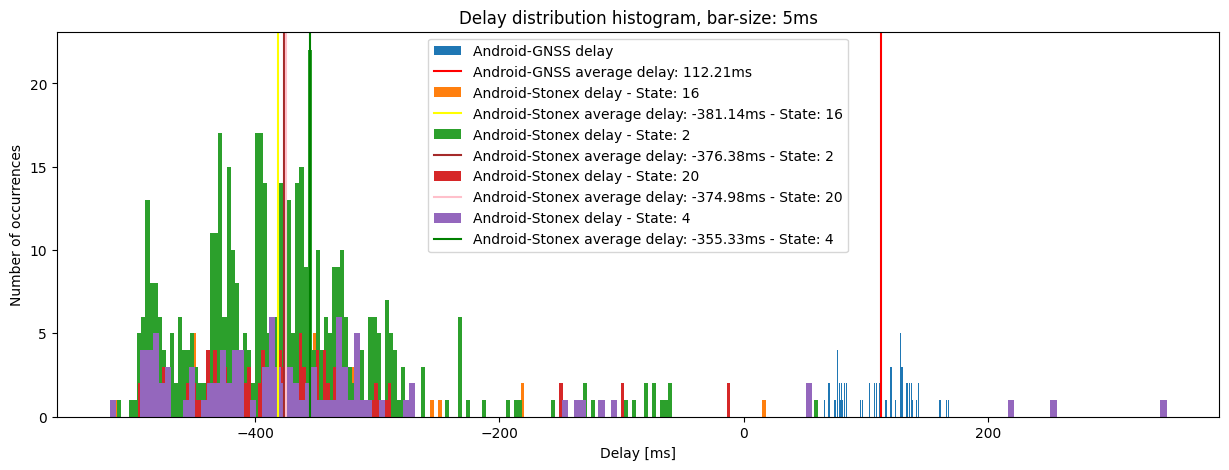

In [105]:
plot_delta_histogram_of_the_day("files/2023_5_2", True)